In [85]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
# loading dataset

In [11]:
with open("/Users/prathamesh/Downloads/dataset.json","r") as f:
    content = f.read()

In [14]:
content = json.loads(content)

In [15]:
df = pd.DataFrame(content)

In [16]:
df

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
1217,Import Loaded on Rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   externalStatus  1222 non-null   object
 1   internalStatus  1222 non-null   object
dtypes: object(2)
memory usage: 19.2+ KB


In [22]:
pd.set_option("display.max_rows",None)
df.externalStatus.value_counts()

externalStatus
Gate out                                                                  144
Gate in                                                                   143
Discharge                                                                 141
Actual time of departure                                                   50
DEPARTCU                                                                   43
Load on MAERSK SEMBAWANG / 237E                                            42
Load on MSC SVEVA / 248E                                                   39
Full Transshipment Loaded                                                  37
Gate out, Empty                                                            36
Loaded at T/S POL                                                          30
Loaded at First POL                                                        30
Empty to Shipper                                                           25
On rail                                          

In [23]:
df.internalStatus.value_counts()

internalStatus
Loaded on Vessel            331
Departure                   287
Gate Out                    146
Gate In                     143
Arrival                      62
Empty Return                 47
Empty Container Released     47
Unloaded on Vessel           37
On Rail                      25
Off Rail                     25
Outbound Terminal            24
Port Out                     15
Port In                      14
In-transit                   10
Inbound Terminal              9
Name: count, dtype: int64

# 

In [ ]:
# clean data (removing symbols)

In [28]:
def clean_data(text):
    text = text.lower()
    text = text.replace("/","").replace("(","").replace(")","").replace(":","").replace("'","")
    
    return text

In [29]:
df["externalStatus"] = df["externalStatus"].apply(clean_data)

In [30]:
df["internalStatus"] = df["internalStatus"].apply(clean_data)

In [31]:
df

,externalStatus,internalStatus
0,port out,port out
1,terminal in,inbound terminal
2,port in,port in
3,vessel departure from first pol vessel name t...,departure
4,vessel arrival at final pod vessel name tian ...,arrival
5,departcu,departure
6,gate in,gate in
7,load on maersk sembawang 237e,loaded on vessel
8,discharge,departure
9,gate out,gate out


# 

In [ ]:
# model building

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
X = df['externalStatus']
y = df['internalStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [53]:
X_train_pad[900]

array([25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
# one hot encoding target variable

In [54]:
from sklearn.preprocessing import OneHotEncoder

Y_train_reshaped = np.array(y_train).reshape(-1, 1)
Y_test_reshaped = np.array(y_test).reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_train_one_hot_encoded = encoder.fit_transform(Y_train_reshaped)
y_test_one_hot_encoded = encoder.fit_transform(Y_test_reshaped)

print(y_test_one_hot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [55]:
y_test_one_hot_encoded.shape

(245, 15)

# 

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [58]:
model = Sequential()
model.add(Dense(100,input_shape=(50,),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dense(15,activation="softmax"))

In [59]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [62]:
model.fit(X_train_pad,y_train_one_hot_encoded,batch_size=32,epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 1.4686 - accuracy: 0.6090
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 1.3764 - accuracy: 0.6366
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 1.3118 - accuracy: 0.6244
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 1.1811 - accuracy: 0.6520
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 1.1908 - accuracy: 0.6407
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 1.1689 - accuracy: 0.6459
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 1.1002 - accuracy: 0.6663
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.6745
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.6817
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.9214 - accuracy: 0.7175
Epoch 11/

31/31 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9222
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9345
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9243
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9406
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9284
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9376
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9376
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9447
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9345
Epoch 92/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9376
Epoch 93/100


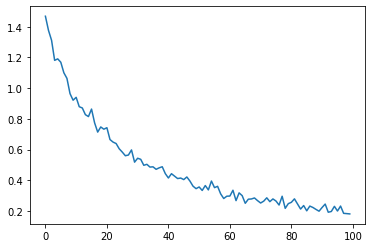

In [63]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])

# 

In [ ]:
# model building with validation data

In [81]:
model1 = Sequential()
model1.add(Dense(100,input_shape=(50,),activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(100,activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(100,activation="relu"))
model1.add(Dense(15,activation="softmax"))

In [82]:
model1.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [83]:
model1.fit(X_train_pad,y_train_one_hot_encoded,batch_size=32,epochs=100,validation_data=(X_test_pad,y_test_one_hot_encoded))

Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 4.7573 - accuracy: 0.2037 - val_loss: 2.8072 - val_accuracy: 0.3347
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 2.7556 - accuracy: 0.3060 - val_loss: 2.2718 - val_accuracy: 0.4980
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 2.4415 - accuracy: 0.4084 - val_loss: 2.0216 - val_accuracy: 0.5388
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 2.2420 - accuracy: 0.4606 - val_loss: 1.9050 - val_accuracy: 0.5592
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 2.1154 - accuracy: 0.4821 - val_loss: 1.8584 - val_accuracy: 0.5633
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 1.9552 - accuracy: 0.5333 - val_loss: 1.7914 - val_accuracy: 0.6816
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 1.8668 - accuracy: 0.5507 - val_loss: 1.6794 - val_accuracy: 0.7143
Epoch 8/100
3

Epoch 59/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8772 - val_loss: 0.4712 - val_accuracy: 0.9224
Epoch 60/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8976 - val_loss: 0.4691 - val_accuracy: 0.9224
Epoch 61/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.9038 - val_loss: 0.4577 - val_accuracy: 0.9551
Epoch 62/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.9038 - val_loss: 0.4511 - val_accuracy: 0.9551
Epoch 63/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8864 - val_loss: 0.4706 - val_accuracy: 0.9551
Epoch 64/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.9048 - val_loss: 0.4442 - val_accuracy: 0.9224
Epoch 65/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8966 - val_loss: 0.4420 - val_accuracy: 0.9551
Epoch 

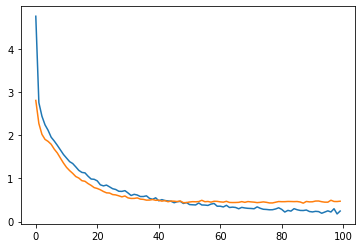

In [84]:
plt.plot(model1.history.history["loss"])
plt.plot(model1.history.history["val_loss"])

# 

In [ ]:
# prediction

In [66]:
y_pred = model.predict(X_train_pad)

31/31 [==============================] - 0s 1ms/step


In [72]:
encoder.inverse_transform(h)

array([['gate in'],
       ['loaded on vessel'],
       ['gate out'],
       ['unloaded on vessel'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['unloaded on vessel'],
       ['gate out'],
       ['arrival'],
       ['loaded on vessel'],
       ['gate in'],
       ['gate out'],
       ['inbound terminal'],
       ['departure'],
       ['arrival'],
       ['empty return'],
       ['departure'],
       ['departure'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['on rail'],
       ['loaded on vessel'],
       ['arrival'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['departure'],
       ['gate out'],
       ['loaded on vessel'],
       ['departure'],
       ['on rail'],
       ['departure'],
       ['port out'],
       ['departure'],
       ['loaded on vessel'],
       ['empty container released'],
       ['off rail'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['gate out'],


In [96]:
y_pred = model.predict(X_test_pad)

8/8 [==============================] - 0s 1ms/step


In [97]:
encoder.inverse_transform(y_pred)

array([['empty return'],
       ['loaded on vessel'],
       ['port out'],
       ['empty return'],
       ['gate in'],
       ['arrival'],
       ['gate in'],
       ['unloaded on vessel'],
       ['loaded on vessel'],
       ['arrival'],
       ['port in'],
       ['loaded on vessel'],
       ['departure'],
       ['departure'],
       ['empty container released'],
       ['loaded on vessel'],
       ['departure'],
       ['arrival'],
       ['loaded on vessel'],
       ['departure'],
       ['loaded on vessel'],
       ['loaded on vessel'],
       ['off rail'],
       ['loaded on vessel'],
       ['gate out'],
       ['empty return'],
       ['gate out'],
       ['gate out'],
       ['loaded on vessel'],
       ['gate out'],
       ['departure'],
       ['gate in'],
       ['off rail'],
       ['departure'],
       ['arrival'],
       ['empty return'],
       ['off rail'],
       ['loaded on vessel'],
       ['departure'],
       ['loaded on vessel'],
       ['port out'],
       ['g

# 

In [ ]:
# model evaluation on training data [loss,accuracy]

In [112]:
model.evaluate(X_train_pad,y_train_one_hot_encoded)

31/31 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9806


[0.04763263836503029, 0.9805527329444885]

In [ ]:
# model evaluation on testing data [loss,accuracy]

In [113]:
model.evaluate(X_test_pad,y_test_one_hot_encoded)

8/8 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.9551


[0.4759126901626587, 0.9551020264625549]

# 

In [ ]:
# predicting on new data point

In [99]:
new_data = ["PORT OUT"]
sequences = tokenizer.texts_to_sequences(new_data)

padded_sequences = pad_sequences(sequences, maxlen=max_length,padding="post")
predictions = model.predict(padded_sequences)

predicted_class_label = encoder.inverse_transform(predictions)
print("class label:", predicted_class_label)


1/1 [==============================] - 0s 23ms/step
Predicted class label: [['port out']]


In [122]:
def predict(data):
    sequences = tokenizer.texts_to_sequences(data)

    padded_sequences = pad_sequences(sequences, maxlen=max_length,padding="post")
    predictions = model.predict(padded_sequences)

    predicted_class_label = encoder.inverse_transform(predictions)
    print("class label:", predicted_class_label)

In [124]:
predict(["port in"])

1/1 [==============================] - 0s 20ms/step
class label: [['port in']]


In [125]:
predict(["Import Loaded on Rail"])

1/1 [==============================] - 0s 21ms/step
class label: [['loaded on vessel']]


# 